In [2]:
%matplotlib inline

import sys
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns

print('Version Information:\n')
print('python: {}'.format(sys.version))
print('matplotlib: {}'.format(matplotlib.__version__))
print('numpy: {}'.format(np.__version__))
print('seaborn: {}'.format(sns.__version__))

Version Information:

python: 3.8.3 (v3.8.3:6f8c8320e9, May 13 2020, 16:29:34) 
[Clang 6.0 (clang-600.0.57)]
matplotlib: 3.2.2
numpy: 1.18.5
seaborn: 0.11.0


In [33]:
pd.set_option('display.max_columns', None)

df_ocm = pd.read_excel("og_data.xls", "Composition-Conditions-Results")
df_elem = pd.read_csv("elemental_features.csv", skiprows=1)
df_ref = pd.read_csv("OCM_Completed.txt")

In [34]:
print(list(df_ref.columns))
df_ref.head()

['Ag', 'Al', 'Ar', 'Au', 'B', 'Ba', 'Be', 'Bi', 'Br', 'C', 'Ca', 'Cd', 'Ce', 'Cl', 'Co', 'Cr', 'Cs', 'Cu', 'Dy', 'Er', 'Eu', 'F', 'Fe', 'Ga', 'Gd', 'Ge', 'Ho', 'I', 'In', 'K', 'La', 'Li', 'Lu', 'Mg', 'Mn', 'Mo', 'N', 'Na', 'Nb', 'Nd', 'Ni', 'P', 'Pb', 'Pd', 'Pr', 'Pt', 'Rb', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Sc', 'Si', 'Sm', 'Sn', 'Sr', 'Ta', 'Tb', 'Te', 'Th', 'Ti', 'Tm', 'V', 'W', 'Y', 'Yb', 'Zn', 'Zr', 'Metal_1 AN', 'Metal_1 AW', 'Metal_1 group', 'Metal_1 period', 'Metal_1 atomic radius', 'Metal_1 electronegativity', 'Metal_1 m. p.', 'Metal_1 b. p.', 'Metal_1 delta_fus H ', 'Metal_1 density', 'Metal_1 ionization enegy ', 'Metal_2 AN', 'Metal_2 AW', 'Metal_2 group', 'Metal_2 period', 'Metal_2 atomic radius', 'Metal_2 electronegativity', 'Metal_2 m. p.', 'Metal_2 b. p.', 'Metal_2 delta_fus H ', 'Metal_2 density', 'Metal_2 ionization enegy ', 'Metal_3 AN', 'Metal_3 AW', 'Metal_3 group', 'Metal_3 period', 'Metal_3 atomic radius', 'Metal_3 electronegativity', 'Metal_3 m. p.', 'Metal_3 b. p.',

,Ag,Al,Ar,Au,B,Ba,Be,Bi,Br,C,Ca,Cd,Ce,Cl,Co,Cr,Cs,Cu,Dy,Er,Eu,F,Fe,Ga,Gd,Ge,Ho,I,In,K,La,Li,Lu,Mg,Mn,Mo,N,Na,Nb,Nd,Ni,P,Pb,Pd,Pr,Pt,Rb,Re,Rh,Ru,S,Sb,Sc,Si,Sm,Sn,Sr,Ta,Tb,Te,Th,Ti,Tm,V,W,Y,Yb,Zn,Zr,Metal_1 AN,Metal_1 AW,Metal_1 group,Metal_1 period,Metal_1 atomic radius,Metal_1 electronegativity,Metal_1 m. p.,Metal_1 b. p.,Metal_1 delta_fus H,Metal_1 density,Metal_1 ionization enegy,Metal_2 AN,Metal_2 AW,Metal_2 group,Metal_2 period,Metal_2 atomic radius,Metal_2 electronegativity,Metal_2 m. p.,Metal_2 b. p.,Metal_2 delta_fus H,Metal_2 density,Metal_2 ionization enegy,Metal_3 AN,Metal_3 AW,Metal_3 group,Metal_3 period,Metal_3 atomic radius,Metal_3 electronegativity,Metal_3 m. p.,Metal_3 b. p.,Metal_3 delta_fus H,Metal_3 density,Metal_3 ionization enegy,Metal_4 AN,Metal_4 AW,Metal_4 group,Metal_4 period,Metal_4 atomic radius,Metal_4 electronegativity,Metal_4 m. p.,Metal_4 b. p.,Metal_4 delta_fus H,Metal_4 density,Metal_4 ionization enegy,Promotor_B,Promotor_Br,Promotor_Cl,Promotor_F,Promotor_P,Promotor_S,Support_Si,Support_La,Support_Ti,Support_Dy,Support_Pr,Support_Mg,Support_Ca,Support_Zn,Support_Y,Support_Nd,Support_Ce,Support_Sm,Support_Al,Support_Tb,Support_C,Support_Yb,Support_Zr,Support_Co,"Temperature, K","p(CH4), bar","p(O2), bar",p(CH4)/p(O2),"P total, bar","Contact time, s",Impregnation,Mech. mixing,Precipitation,Pyrolysis,Sol-gel,Therm.decomp.,"Y(C2),%\"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,230.0,505.4296,64.4,36.8,14.812,14.720,13974.800,21472.8,118.7720,67.160,68.39280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.8,0.0,0.0,0.0,0.0,0.0,1073.0,0.4,0.08,4.8,1.0,0.04,1.0,0.0,0.0,0.0,0.0,0.0,5.0\
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,225.6,528.3317,56.4,23.5,7.567,6.862,2792.834,4888.0,29.1870,40.843,42.27086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.3,0.0,0.0,0.0,0.0,0.0,1073.0,0.4,0.08,4.8,1.0,0.04,1.0,0.0,0.0,0.0,0.0,0.0,4.0\
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,225.0,534.1950,63.0,22.5,6.525,7.740,2272.860,12937.5,32.2785,32.670,33.07230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.5,0.0,0.0,0.0,0.0,0.0,1073.0,0.4,0.08,4.8,1.0,0.04,1.0,0.0,0.0,0.0,0.0,0.0,0.4\
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,228.8,497.8168,41.6,41.6,18.304,13.728,20186.400,37024.0,147.1600,46.904,71.01224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.6,0.0,0.0,0.0,0.0,0.0,1073.0,0.4,0.08,4.8,1.0,0.04,1.0,0.0,0.0,0.0,0.0,0.0,3.0\
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

# OCM dataset (df_ocm)

In [35]:
df_ocm1 = df_ocm.drop(0)
df_ocm1 = df_ocm1.fillna(0)
df_ocm1 = df_ocm1.drop(columns = ['Nr of publication', 'X(O2), %', 'X(CH4), %', 'S(COx), %', 'S(C2=), %', 'S(C2-), %', 'S(C2), %', 'Basicity', 'Acidity', 'Electro-negativity', 'Anion conductivity', 'p/n conductivity'])
df_ocm1.head()

,Cation 1,Unnamed: 2,Cation 2,Unnamed: 4,Cation 3,Unnamed: 6,Cation 4,Unnamed: 8,Anion 1,Unnamed: 10,Anion 2,Unnamed: 12,Pro- motor,Support 1,Unnamed: 15,Support 2,Unnamed: 17,Unnamed: 18,Preparation,"Temperature, K","p(CH4), bar","p(O2), bar",p(CH4)/p(O2),"P total, bar","Contact time, s","Y(C2),%"
1,Mn,9.2,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,Al,90.8,0,0.0,100.0,Impregnation,1073.0,0.4,0.084,4.761905,1.013,0.04,5.0050
2,Cd,4.7,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,Al,95.3,0,0.0,100.0,Impregnation,1073.0,0.4,0.084,4.761905,1.013,0.04,4.0000
3,Sn,4.5,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,Al,95.5,0,0.0,100.0,Impregnation,1073.0,0.4,0.084,4.761905,1.013,0.04,0.4032
4,Ti,10.4,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,Al,89.6,0,0.0,100.0,Impregnation,1073.0,0.4,0.084,4.761905,1.013,0.04,2.9988
5,Pt,2.8,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,Al,97.2,0,0.0,100.0,Impregnation,1073.0,0.4,0.084,4.761905,1.013,0.04,0.1040


In [36]:
df_ocm_og = df_ocm1
df_ocm_og = df_ocm_og[['Temperature, K', 'p(CH4), bar', 'p(O2), bar', 'p(CH4)/p(O2)', 'P total, bar', 'Contact time, s', 'Y(C2),%']]
df_ocm_og.head()

,"Temperature, K","p(CH4), bar","p(O2), bar",p(CH4)/p(O2),"P total, bar","Contact time, s","Y(C2),%"
1,1073.0,0.4,0.084,4.761905,1.013,0.04,5.0050
2,1073.0,0.4,0.084,4.761905,1.013,0.04,4.0000
3,1073.0,0.4,0.084,4.761905,1.013,0.04,0.4032
4,1073.0,0.4,0.084,4.761905,1.013,0.04,2.9988
5,1073.0,0.4,0.084,4.761905,1.013,0.04,0.1040


In [37]:
df_ocm_og2 = df_ocm_og.copy()
for i in range(0, len(df_ocm_og2['Contact time, s'])):
    #print(i)
    time = df_ocm_og2['Contact time, s'][i+1]
    if isinstance(time, str):
        time = time.strip()
    if isinstance(time, str) and '*' in time:
        sci_note = time.split('*')
        sci_note[0] = pd.to_numeric(sci_note[0])
        base, exp = sci_note[1].split('-')
        time = sci_note[0] * pd.to_numeric(base)**pd.to_numeric(exp)
    df_ocm_og2['Contact time, s'][i] = time
print(type(df_ocm_og2['Contact time, s'][1]))
df_ocm_og2['Contact time, s'][1]

<class 'float'>


<ipython-input-37-ee0fb32b13ce>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ocm_og2['Contact time, s'][i] = time


0.04

In [38]:
df_ocm_og2['Contact time, s'] = pd.to_numeric(df_ocm_og2['Contact time, s'])
type(df_ocm_og2['Contact time, s'][1])

In [63]:
df_ocm_og2

,index,"Temperature, K","p(CH4), bar","p(O2), bar",p(CH4)/p(O2),"P total, bar","Contact time, s","Y(C2),%"
0,0,1073.0,0.4,0.084,4.761905,1.013,0.04,5.0050
1,1,1073.0,0.4,0.084,4.761905,1.013,0.04,4.0000
2,2,1073.0,0.4,0.084,4.761905,1.013,0.04,0.4032
3,3,1073.0,0.4,0.084,4.761905,1.013,0.04,2.9988
4,4,1073.0,0.4,0.084,4.761905,1.013,0.04,0.1040
...,...,...,...,...,...,...,...,...
1861,1861,1048.0,0.5,0.105,4.761905,1.013,1.50,1.2000
1862,1862,1048.0,0.5,0.105,4.761905,1.013,1.50,2.6000
1863,1863,1048.0,0.5,0.105,4.761905,1.013,1.50,5.1200
1864,1864,1048.0,0.5,0.105,4.761905,1.013,1.50,3.1200


In [40]:
df_ocm1.describe()

,Unnamed: 2,Unnamed: 4,Unnamed: 6,Unnamed: 8,Unnamed: 10,Unnamed: 12,Unnamed: 15,Unnamed: 17,Unnamed: 18,"Temperature, K","p(CH4), bar","p(O2), bar",p(CH4)/p(O2),"P total, bar","Y(C2),%"
count,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000
mean,28.551506,37.372454,12.037053,1.226259,5.527310,0.174652,14.305466,0.805252,55.466399,1029.587889,0.487777,0.109193,6.637912,1.017011,9.530922
std,32.526994,36.585285,25.635285,8.123663,13.943235,2.579928,31.728472,7.174098,57.273173,89.182123,0.294747,0.083205,16.896860,0.144912,6.688996
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1013.000000,0.245500,0.051000,2.380952,1.013000,3.961550
50%,14.300000,26.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.500000,1023.000000,0.500000,0.083000,4.392523,1.013000,8.942500
75%,44.400000,75.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,100.000000,1073.000000,0.750000,0.150000,8.009009,1.013000,14.108575
max,100.000000,99.900000,98.100000,96.400000,87.400000,50.000000,99.800000,84.000000,199.700000,1373.000000,2.700000,1.350000,600.000000,4.500000,38.000000


## Element Encoding

In [41]:
columns_elem = ['Ag', 'Al', 'Ar', 'Au', 'B', 'Ba', 'Be', 'Bi', 'Br', 'C', 'Ca', 'Cd', 'Ce', 'Cl', 'Co', 'Cr', 'Cs', 'Cu', 'Dy', 'Er', 'Eu', 'F', 'Fe', 'Ga', 'Gd', 'Ge', 'Ho', 'I', 'In', 'K', 'La', 'Li', 'Lu', 'Mg', 'Mn', 'Mo', 'N', 'Na', 'Nb', 'Nd', 'Ni', 'P', 'Pb', 'Pd', 'Pr', 'Pt', 'Rb', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Sc', 'Si', 'Sm', 'Sn', 'Sr', 'Ta', 'Tb', 'Te', 'Th', 'Ti', 'Tm', 'V', 'W', 'Y', 'Yb', 'Zn', 'Zr']
enc = ['Cation 1', 'Cation 2', 'Cation 3', 'Cation 4', 'Anion 1', 'Anion 2']
enc_mol = ['Unnamed: 2', 'Unnamed: 4', 'Unnamed: 6', 'Unnamed: 8', 'Unnamed: 10', 'Unnamed: 12']
df_ocm_oh = pd.DataFrame()
l_col = len(columns_elem)
for i in range(0, len(df_ocm1)):
    row_i = np.zeros((1, l_col))
    example = df_ocm1.iloc[i]
    
    for i in range(0, len(enc)):
        enc_i = enc[i]
        enc_mol_i = enc_mol[i]
        is_zero = example[enc_i] == 0
        if not is_zero:
            ind = columns_elem.index(example[enc_i].strip().title())
            row_i[0, ind] = example[enc_mol_i]
    
    df_ocm_oh = df_ocm_oh.append(pd.DataFrame(row_i))
df_ocm_oh.columns = columns_elem
df_ocm_oh.head()

,Ag,Al,Ar,Au,B,Ba,Be,Bi,Br,C,Ca,Cd,Ce,Cl,Co,Cr,Cs,Cu,Dy,Er,Eu,F,Fe,Ga,Gd,Ge,Ho,I,In,K,La,Li,Lu,Mg,Mn,Mo,N,Na,Nb,Nd,Ni,P,Pb,Pd,Pr,Pt,Rb,Re,Rh,Ru,S,Sb,Sc,Si,Sm,Sn,Sr,Ta,Tb,Te,Th,Ti,Tm,V,W,Y,Yb,Zn,Zr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Support Encoding

In [42]:
columns_support = ['Support_Si', 'Support_La', 'Support_Ti', 'Support_Dy', 'Support_Pr', 'Support_Mg', 'Support_Ca', 'Support_Zn', 'Support_Y', 'Support_Nd', 'Support_Ce', 'Support_Sm', 'Support_Al', 'Support_Tb', 'Support_C', 'Support_Yb', 'Support_Zr', 'Support_Co']
columns_support_elem = []

for i in columns_support:
    columns_support_elem.append(i.split('_')[1])
print(columns_support_elem)
enc = ['Support 1', 'Support 2']
enc_mol = ['Unnamed: 15', 'Unnamed: 17']
df_ocm_sup = pd.DataFrame()
l_col = len(columns_support)
for i in range(0, len(df_ocm1)):
    row_i = np.zeros((1, l_col))
    example = df_ocm1.iloc[i]
    
    for j in range(0, len(enc)):
        enc_j = enc[j]
        enc_mol_j = enc_mol[j]
        is_zero = example[enc_j] == 0
        if not is_zero:
            ind = columns_support_elem.index(example[enc_j].strip().title())
            row_i[0, ind] = example[enc_mol_j]
    df_ocm_sup = df_ocm_sup.append(pd.DataFrame(row_i))
df_ocm_sup.columns = columns_support
df_ocm_sup.head()

['Si', 'La', 'Ti', 'Dy', 'Pr', 'Mg', 'Ca', 'Zn', 'Y', 'Nd', 'Ce', 'Sm', 'Al', 'Tb', 'C', 'Yb', 'Zr', 'Co']


,Support_Si,Support_La,Support_Ti,Support_Dy,Support_Pr,Support_Mg,Support_Ca,Support_Zn,Support_Y,Support_Nd,Support_Ce,Support_Sm,Support_Al,Support_Tb,Support_C,Support_Yb,Support_Zr,Support_Co
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.8,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.3,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.5,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.6,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.2,0.0,0.0,0.0,0.0,0.0


## Promoter Encoding

In [43]:
columns_pro = ['Promotor_B', 'Promotor_Br', 'Promotor_Cl', 'Promotor_F', 'Promotor_P', 'Promotor_S']
columns_pro_elem = []
for i in columns_pro:
    columns_pro_elem.append(i.split('_')[1])
print(columns_pro_elem)
enc = ['Pro- motor']
df_ocm_pro = pd.DataFrame()
l_col = len(columns_pro)
for i in range(0, len(df_ocm1)):
    row_i = np.zeros((1, l_col))
    example = df_ocm1.iloc[i]
    is_zero = example[enc][0] == 0
#     print(example[enc])
#     print(is_zero)
    if not is_zero:
        promotor = example[enc][0]
#         print(promotor)
#         print(len(promotor) > 2)
        if len(promotor) > 2:
            promotor = promotor.strip().split(',')
            for p in promotor:
                ind = columns_pro_elem.index(p.strip().title())
                row_i[0, ind] = 1
        else:
            ind = columns_pro_elem.index(promotor.strip().title())
            row_i[0, ind] = 1
    df_ocm_pro = df_ocm_pro.append(pd.DataFrame(row_i))
df_ocm_pro.columns = columns_pro
assert(len(df_ocm_pro)==len(df_ocm1))
df_ocm_pro.head()

['B', 'Br', 'Cl', 'F', 'P', 'S']


,Promotor_B,Promotor_Br,Promotor_Cl,Promotor_F,Promotor_P,Promotor_S
0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0


## Preparation Encoding

In [44]:
df_ocm1['Preparation'].unique()

array(['Impregnation', 'Therm.decomp.', 'n.a.', 'Sol-gel',
       'Precipitation', 'Pyrolysis', 'Impregnation ', 'Mech. Mixing',
       'Precipitation ', 'impregnation', 'precipitation', 'sol-gel'],
      dtype=object)

In [45]:
columns_prep = ['Impregnation', 'Mech. Mixing', 'Precipitation', 'Pyrolysis', 'Sol-Gel', 'Therm.Decomp.']
enc = ['Preparation']
df_ocm_prep = pd.DataFrame()
l_col = len(columns_prep)
for i in range(0, len(df_ocm1)):
    row_i = np.zeros((1, l_col))
    example = df_ocm1.iloc[i]
    is_zero = example[enc][0] == 0
    is_NaN = example[enc][0] == 'n.a.'
    if not is_zero and not is_NaN:
        prep = example[enc][0]
        ind = columns_prep.index(prep.strip().title())
        row_i[0, ind] = 1
    df_ocm_prep = df_ocm_prep.append(pd.DataFrame(row_i))
df_ocm_prep.columns = columns_prep
assert(len(df_ocm_prep)==len(df_ocm1))
df_ocm_prep.head()

,Impregnation,Mech. Mixing,Precipitation,Pyrolysis,Sol-Gel,Therm.Decomp.
0,1.0,0.0,0.0,0.0,0.0,0.0
0,1.0,0.0,0.0,0.0,0.0,0.0
0,1.0,0.0,0.0,0.0,0.0,0.0
0,1.0,0.0,0.0,0.0,0.0,0.0
0,1.0,0.0,0.0,0.0,0.0,0.0


## Elemental Info Encoding

In [46]:
df_elem = df_elem.fillna(0)
df_elem.head()

,AN,symbol,name,AW,group,period,atomic radius,ionic radius,covalent radius,VdW radius,crystal radius,electronegativity,m. p.,b. p.,delta_fus H,density,a x 106,Heat capacity,l,ionization enegy,electron affinity,VE,Surface energy
0,1,H,hydrogen,1.0079,1.0,1.0,0.53,0.25,0.37,1.20,0.10,2.20,14.01,20.280,0.120,0.000,0.0,28.836,0.000,13.5984,0.754195,1.0,0.00
1,2,He,helium,4.0026,18.0,1.0,0.31,0.31,0.32,1.40,0.00,0.00,0.00,4.222,0.000,0.000,0.0,20.786,0.000,24.5874,0.000000,2.0,0.00
2,3,Li,lithium,6.9410,1.0,2.0,1.67,1.45,1.34,1.82,0.90,0.97,453.69,1615.000,3.000,0.534,46.0,24.860,0.847,5.3917,0.618049,1.0,0.46
3,4,Be,beryllium,9.0122,2.0,2.0,1.12,1.05,0.90,0.00,0.41,1.47,1560.00,2742.000,7.895,1.850,11.3,16.443,2.000,9.3227,0.000000,2.0,1.79
4,5,B,boron,10.8110,13.0,2.0,0.87,0.85,0.82,0.00,0.25,2.01,2349.00,4200.000,50.200,2.340,0.0,11.087,0.000,8.2980,0.279723,3.0,2.74


In [47]:
columns_elem2 = ['Metal_1 AN', 'Metal_1 AW', 'Metal_1 group', 'Metal_1 period', 'Metal_1 atomic radius', 'Metal_1 electronegativity', 'Metal_1 m.p.', 'Metal_1 b.p.', 'Metal_1 delta_fus H ', 'Metal_1 density', 'Metal_1 ionization enegy ', 'Metal_1 VE', 'Metal_1 SE', 'Metal_2 AN', 'Metal_2 AW', 'Metal_2 group', 'Metal_2 period', 'Metal_2 atomic radius', 'Metal_2 electronegativity', 'Metal_2 m.p.', 'Metal_2 b.p.', 'Metal_2 delta_fus H ', 'Metal_2 density', 'Metal_2 ionization enegy ', 'Metal_2 VE', 'Metal_2 SE', 'Metal_3 AN', 'Metal_3 AW', 'Metal_3 group', 'Metal_3 period', 'Metal_3 atomic radius', 'Metal_3 electronegativity', 'Metal_3 m. p.', 'Metal_3 b. p.', 'Metal_3 delta_fus H ', 'Metal_3 density', 'Metal_3 ionization enegy ', 'Metal_3 VE', 'Metal_3 SE', 'Metal_4 AN', 'Metal_4 AW', 'Metal_4 group', 'Metal_4 period', 'Metal_4 atomic radius', 'Metal_4 electronegativity', 'Metal_4 m. p.', 'Metal_4 b. p.', 'Metal_4 delta_fus H', 'Metal_4 density', 'Metal_4 ionization enegy', 'Metal_4 VE', 'Metal_4 SE']
enc_elem = ['Cation 1', 'Cation 2', 'Cation 3', 'Cation 4']
enc_feat = ['AN', 'AW', 'group', 'period', 'atomic radius', 'electronegativity', 'm. p.', 'b. p.', 'delta_fus H', 'density', 'ionization enegy', 'VE', 'Surface energy']
num_feat = 13
df_elem_oh = pd.DataFrame()
l_col = len(columns_elem2)
for i in range(0, len(df_ocm1)):
    row_i = np.zeros((1, l_col))
    example = df_ocm1.iloc[i]
    for j in range(0, len(enc_elem)):
        enc_ej = enc_elem[j]
        is_zero = example[enc_ej] == 0
        if not is_zero:
            elem = example[enc_ej].strip().title()
#             print(elem)
#             print(df_elem['symbol'] == elem)
#             print(df_elem['AN'][df_elem['symbol'] == 'Mn'])
            row_i[0,0 + j*num_feat] = df_elem['AN'][df_elem['symbol'] == elem].values
            row_i[0,1 + j*num_feat] = df_elem['AW'][df_elem['symbol'] == elem].values
            row_i[0,2 + j*num_feat] = df_elem['group'][df_elem['symbol'] == elem].values
            row_i[0,3 + j*num_feat] = df_elem['period'][df_elem['symbol'] == elem].values
            row_i[0,4 + j*num_feat] = df_elem['atomic radius'][df_elem['symbol'] == elem].values
            row_i[0,5 + j*num_feat] = df_elem['electronegativity'][df_elem['symbol'] == elem].values
            row_i[0,6 + j*num_feat] = df_elem['m. p.'][df_elem['symbol'] == elem].values
            row_i[0,7 + j*num_feat] = df_elem['b. p.'][df_elem['symbol'] == elem].values
            row_i[0,8 + j*num_feat] = df_elem['delta_fus H'][df_elem['symbol'] == elem].values
            row_i[0,9 + j*num_feat] = df_elem['density'][df_elem['symbol'] == elem].values
            row_i[0,10 + j*num_feat] = df_elem['ionization enegy'][df_elem['symbol'] == elem].values
            row_i[0,11 + j*num_feat] = df_elem['VE'][df_elem['symbol'] == elem].values
            row_i[0,12 + j*num_feat] = df_elem['Surface energy'][df_elem['symbol'] == elem].values
    
    df_elem_oh = df_elem_oh.append(pd.DataFrame(row_i))
df_elem_oh.columns = columns_elem2
df_elem_oh.head()


,Metal_1 AN,Metal_1 AW,Metal_1 group,Metal_1 period,Metal_1 atomic radius,Metal_1 electronegativity,Metal_1 m.p.,Metal_1 b.p.,Metal_1 delta_fus H,Metal_1 density,Metal_1 ionization enegy,Metal_1 VE,Metal_1 SE,Metal_2 AN,Metal_2 AW,Metal_2 group,Metal_2 period,Metal_2 atomic radius,Metal_2 electronegativity,Metal_2 m.p.,Metal_2 b.p.,Metal_2 delta_fus H,Metal_2 density,Metal_2 ionization enegy,Metal_2 VE,Metal_2 SE,Metal_3 AN,Metal_3 AW,Metal_3 group,Metal_3 period,Metal_3 atomic radius,Metal_3 electronegativity,Metal_3 m. p.,Metal_3 b. p.,Metal_3 delta_fus H,Metal_3 density,Metal_3 ionization enegy,Metal_3 VE,Metal_3 SE,Metal_4 AN,Metal_4 AW,Metal_4 group,Metal_4 period,Metal_4 atomic radius,Metal_4 electronegativity,Metal_4 m. p.,Metal_4 b. p.,Metal_4 delta_fus H,Metal_4 density,Metal_4 ionization enegy,Metal_4 VE,Metal_4 SE
0,25.0,54.938,7.0,4.0,1.61,1.60,1519.00,2334.0,12.910,7.30,7.4340,7.0,3.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,48.0,112.411,12.0,5.0,1.61,1.46,594.22,1040.0,6.210,8.69,8.9938,12.0,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,50.0,118.710,14.0,5.0,1.45,1.72,505.08,2875.0,7.173,7.26,7.3494,4.0,0.54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,22.0,47.867,4.0,4.0,1.76,1.32,1941.00,3560.0,14.150,4.51,6.8281,4.0,1.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,78.0,195.084,10.0,6.0,1.77,1.44,2041.40,4098.0,22.170,21.50,8.9588,10.0,1.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Combine all one hot encoded items

In [48]:
df1 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
                   columns=['a', 'b', 'c'])
df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
                   columns=['d', 'e', 'f'])

In [49]:
df1

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [50]:
df2

,d,e,f
0,1,2,3
1,4,5,6
2,7,8,9


In [51]:
result = pd.concat([df1, df2], axis=1, sort=False)

In [52]:
result

,a,b,c,d,e,f
0,1,2,3,1,2,3
1,4,5,6,4,5,6
2,7,8,9,7,8,9


In [53]:
mega = pd.concat([df_ocm_oh, df_ocm_sup], axis=1, sort=False)
print(len(mega))
print(len(mega.columns))
mega.head()
#[df_ocm_oh, df_ocm_sup, df_ocm_pro, df_ocm_prep, df_elem_oh, df_ocm_og]

1866
87


,Ag,Al,Ar,Au,B,Ba,Be,Bi,Br,C,Ca,Cd,Ce,Cl,Co,Cr,Cs,Cu,Dy,Er,Eu,F,Fe,Ga,Gd,Ge,Ho,I,In,K,La,Li,Lu,Mg,Mn,Mo,N,Na,Nb,Nd,Ni,P,Pb,Pd,Pr,Pt,Rb,Re,Rh,Ru,S,Sb,Sc,Si,Sm,Sn,Sr,Ta,Tb,Te,Th,Ti,Tm,V,W,Y,Yb,Zn,Zr,Support_Si,Support_La,Support_Ti,Support_Dy,Support_Pr,Support_Mg,Support_Ca,Support_Zn,Support_Y,Support_Nd,Support_Ce,Support_Sm,Support_Al,Support_Tb,Support_C,Support_Yb,Support_Zr,Support_Co
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.8,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.3,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.5,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.6,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.2,0.0,0.0,0.0,0.0,0.0


In [54]:
mega = pd.concat([mega, df_ocm_pro], axis=1, sort=False)
print(len(mega))
print(len(mega.columns))
mega.head()

1866
93


,Ag,Al,Ar,Au,B,Ba,Be,Bi,Br,C,Ca,Cd,Ce,Cl,Co,Cr,Cs,Cu,Dy,Er,Eu,F,Fe,Ga,Gd,Ge,Ho,I,In,K,La,Li,Lu,Mg,Mn,Mo,N,Na,Nb,Nd,Ni,P,Pb,Pd,Pr,Pt,Rb,Re,Rh,Ru,S,Sb,Sc,Si,Sm,Sn,Sr,Ta,Tb,Te,Th,Ti,Tm,V,W,Y,Yb,Zn,Zr,Support_Si,Support_La,Support_Ti,Support_Dy,Support_Pr,Support_Mg,Support_Ca,Support_Zn,Support_Y,Support_Nd,Support_Ce,Support_Sm,Support_Al,Support_Tb,Support_C,Support_Yb,Support_Zr,Support_Co,Promotor_B,Promotor_Br,Promotor_Cl,Promotor_F,Promotor_P,Promotor_S
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
mega = pd.concat([mega, df_ocm_prep], axis=1, sort=False)
print(len(mega))
print(len(mega.columns))
mega.head()

1866
99


,Ag,Al,Ar,Au,B,Ba,Be,Bi,Br,C,Ca,Cd,Ce,Cl,Co,Cr,Cs,Cu,Dy,Er,Eu,F,Fe,Ga,Gd,Ge,Ho,I,In,K,La,Li,Lu,Mg,Mn,Mo,N,Na,Nb,Nd,Ni,P,Pb,Pd,Pr,Pt,Rb,Re,Rh,Ru,S,Sb,Sc,Si,Sm,Sn,Sr,Ta,Tb,Te,Th,Ti,Tm,V,W,Y,Yb,Zn,Zr,Support_Si,Support_La,Support_Ti,Support_Dy,Support_Pr,Support_Mg,Support_Ca,Support_Zn,Support_Y,Support_Nd,Support_Ce,Support_Sm,Support_Al,Support_Tb,Support_C,Support_Yb,Support_Zr,Support_Co,Promotor_B,Promotor_Br,Promotor_Cl,Promotor_F,Promotor_P,Promotor_S,Impregnation,Mech. Mixing,Precipitation,Pyrolysis,Sol-Gel,Therm.Decomp.
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [56]:
mega = pd.concat([mega, df_elem_oh], axis=1, sort=False)
print(len(mega))
print(len(mega.columns))
mega.head()

1866
151


,Ag,Al,Ar,Au,B,Ba,Be,Bi,Br,C,Ca,Cd,Ce,Cl,Co,Cr,Cs,Cu,Dy,Er,Eu,F,Fe,Ga,Gd,Ge,Ho,I,In,K,La,Li,Lu,Mg,Mn,Mo,N,Na,Nb,Nd,Ni,P,Pb,Pd,Pr,Pt,Rb,Re,Rh,Ru,S,Sb,Sc,Si,Sm,Sn,Sr,Ta,Tb,Te,Th,Ti,Tm,V,W,Y,Yb,Zn,Zr,Support_Si,Support_La,Support_Ti,Support_Dy,Support_Pr,Support_Mg,Support_Ca,Support_Zn,Support_Y,Support_Nd,Support_Ce,Support_Sm,Support_Al,Support_Tb,Support_C,Support_Yb,Support_Zr,Support_Co,Promotor_B,Promotor_Br,Promotor_Cl,Promotor_F,Promotor_P,Promotor_S,Impregnation,Mech. Mixing,Precipitation,Pyrolysis,Sol-Gel,Therm.Decomp.,Metal_1 AN,Metal_1 AW,Metal_1 group,Metal_1 period,Metal_1 atomic radius,Metal_1 electronegativity,Metal_1 m.p.,Metal_1 b.p.,Metal_1 delta_fus H,Metal_1 density,Metal_1 ionization enegy,Metal_1 VE,Metal_1 SE,Metal_2 AN,Metal_2 AW,Metal_2 group,Metal_2 period,Metal_2 atomic radius,Metal_2 electronegativity,Metal_2 m.p.,Metal_2 b.p.,Metal_2 delta_fus H,Metal_2 density,Metal_2 ionization enegy,Metal_2 VE,Metal_2 SE,Metal_3 AN,Metal_3 AW,Metal_3 group,Metal_3 period,Metal_3 atomic radius,Metal_3 electronegativity,Metal_3 m. p.,Metal_3 b. p.,Metal_3 delta_fus H,Metal_3 density,Metal_3 ionization enegy,Metal_3 VE,Metal_3 SE,Metal_4 AN,Metal_4 AW,Metal_4 group,Metal_4 period,Metal_4 atomic radius,Metal_4 electronegativity,Metal_4 m. p.,Metal_4 b. p.,Metal_4 delta_fus H,Metal_4 density,Metal_4 ionization enegy,Metal_4 VE,Metal_4 SE
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,25.0,54.938,7.0,4.0,1.61,1.60,1519.00,2334.0,12.910,7.30,7.4340,7.0,3.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,48.0,112.411,12.0,5.0,1.61,1.46,594.22,1040.0,6.210,8.69,8.9938,12.0,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,50.0,118.710,14.0,5.0,1.45,1.72,505.08,2875.0,7.173,7.26,7.3494,4.0,0.54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,22.0,47.867,4.0,4.0,1.76,1.32,1941.00,3560.0,14.150,4.51,6.8281,4.0,1.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [57]:
mega = mega.reset_index().drop(columns=['index'])
print(len(mega))
print(len(mega.columns))
mega.head()

1866
151


,Ag,Al,Ar,Au,B,Ba,Be,Bi,Br,C,Ca,Cd,Ce,Cl,Co,Cr,Cs,Cu,Dy,Er,Eu,F,Fe,Ga,Gd,Ge,Ho,I,In,K,La,Li,Lu,Mg,Mn,Mo,N,Na,Nb,Nd,Ni,P,Pb,Pd,Pr,Pt,Rb,Re,Rh,Ru,S,Sb,Sc,Si,Sm,Sn,Sr,Ta,Tb,Te,Th,Ti,Tm,V,W,Y,Yb,Zn,Zr,Support_Si,Support_La,Support_Ti,Support_Dy,Support_Pr,Support_Mg,Support_Ca,Support_Zn,Support_Y,Support_Nd,Support_Ce,Support_Sm,Support_Al,Support_Tb,Support_C,Support_Yb,Support_Zr,Support_Co,Promotor_B,Promotor_Br,Promotor_Cl,Promotor_F,Promotor_P,Promotor_S,Impregnation,Mech. Mixing,Precipitation,Pyrolysis,Sol-Gel,Therm.Decomp.,Metal_1 AN,Metal_1 AW,Metal_1 group,Metal_1 period,Metal_1 atomic radius,Metal_1 electronegativity,Metal_1 m.p.,Metal_1 b.p.,Metal_1 delta_fus H,Metal_1 density,Metal_1 ionization enegy,Metal_1 VE,Metal_1 SE,Metal_2 AN,Metal_2 AW,Metal_2 group,Metal_2 period,Metal_2 atomic radius,Metal_2 electronegativity,Metal_2 m.p.,Metal_2 b.p.,Metal_2 delta_fus H,Metal_2 density,Metal_2 ionization enegy,Metal_2 VE,Metal_2 SE,Metal_3 AN,Metal_3 AW,Metal_3 group,Metal_3 period,Metal_3 atomic radius,Metal_3 electronegativity,Metal_3 m. p.,Metal_3 b. p.,Metal_3 delta_fus H,Metal_3 density,Metal_3 ionization enegy,Metal_3 VE,Metal_3 SE,Metal_4 AN,Metal_4 AW,Metal_4 group,Metal_4 period,Metal_4 atomic radius,Metal_4 electronegativity,Metal_4 m. p.,Metal_4 b. p.,Metal_4 delta_fus H,Metal_4 density,Metal_4 ionization enegy,Metal_4 VE,Metal_4 SE
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,25.0,54.938,7.0,4.0,1.61,1.60,1519.00,2334.0,12.910,7.30,7.4340,7.0,3.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,48.0,112.411,12.0,5.0,1.61,1.46,594.22,1040.0,6.210,8.69,8.9938,12.0,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,50.0,118.710,14.0,5.0,1.45,1.72,505.08,2875.0,7.173,7.26,7.3494,4.0,0.54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,22.0,47.867,4.0,4.0,1.76,1.32,1941.00,3560.0,14.150,4.51,6.8281,4.0,1.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [68]:
df_ocm_og2

,level_0,"Temperature, K","p(CH4), bar","p(O2), bar",p(CH4)/p(O2),"P total, bar","Contact time, s","Y(C2),%"
0,0,1073.0,0.4,0.084,4.761905,1.013,0.04,5.0050
1,1,1073.0,0.4,0.084,4.761905,1.013,0.04,4.0000
2,2,1073.0,0.4,0.084,4.761905,1.013,0.04,0.4032
3,3,1073.0,0.4,0.084,4.761905,1.013,0.04,2.9988
4,4,1073.0,0.4,0.084,4.761905,1.013,0.04,0.1040
...,...,...,...,...,...,...,...,...
1861,1861,1048.0,0.5,0.105,4.761905,1.013,1.50,1.2000
1862,1862,1048.0,0.5,0.105,4.761905,1.013,1.50,2.6000
1863,1863,1048.0,0.5,0.105,4.761905,1.013,1.50,5.1200
1864,1864,1048.0,0.5,0.105,4.761905,1.013,1.50,3.1200


In [69]:
df_ocm_og2 = df_ocm_og2.reset_index().drop(columns=['index', 'level_0'])
print(len(df_ocm_og2))
print(len(df_ocm_og2.columns))
df_ocm_og2.head()

1866
7


,"Temperature, K","p(CH4), bar","p(O2), bar",p(CH4)/p(O2),"P total, bar","Contact time, s","Y(C2),%"
0,1073.0,0.4,0.084,4.761905,1.013,0.04,5.0050
1,1073.0,0.4,0.084,4.761905,1.013,0.04,4.0000
2,1073.0,0.4,0.084,4.761905,1.013,0.04,0.4032
3,1073.0,0.4,0.084,4.761905,1.013,0.04,2.9988
4,1073.0,0.4,0.084,4.761905,1.013,0.04,0.1040


In [71]:
mega2 = pd.concat([mega, df_ocm_og2], axis=1, sort=False)
print(len(mega2))
print(len(mega2.columns))
mega2.head()

1866
158


,Ag,Al,Ar,Au,B,Ba,Be,Bi,Br,C,Ca,Cd,Ce,Cl,Co,Cr,Cs,Cu,Dy,Er,Eu,F,Fe,Ga,Gd,Ge,Ho,I,In,K,La,Li,Lu,Mg,Mn,Mo,N,Na,Nb,Nd,Ni,P,Pb,Pd,Pr,Pt,Rb,Re,Rh,Ru,S,Sb,Sc,Si,Sm,Sn,Sr,Ta,Tb,Te,Th,Ti,Tm,V,W,Y,Yb,Zn,Zr,Support_Si,Support_La,Support_Ti,Support_Dy,Support_Pr,Support_Mg,Support_Ca,Support_Zn,Support_Y,Support_Nd,Support_Ce,Support_Sm,Support_Al,Support_Tb,Support_C,Support_Yb,Support_Zr,Support_Co,Promotor_B,Promotor_Br,Promotor_Cl,Promotor_F,Promotor_P,Promotor_S,Impregnation,Mech. Mixing,Precipitation,Pyrolysis,Sol-Gel,Therm.Decomp.,Metal_1 AN,Metal_1 AW,Metal_1 group,Metal_1 period,Metal_1 atomic radius,Metal_1 electronegativity,Metal_1 m.p.,Metal_1 b.p.,Metal_1 delta_fus H,Metal_1 density,Metal_1 ionization enegy,Metal_1 VE,Metal_1 SE,Metal_2 AN,Metal_2 AW,Metal_2 group,Metal_2 period,Metal_2 atomic radius,Metal_2 electronegativity,Metal_2 m.p.,Metal_2 b.p.,Metal_2 delta_fus H,Metal_2 density,Metal_2 ionization enegy,Metal_2 VE,Metal_2 SE,Metal_3 AN,Metal_3 AW,Metal_3 group,Metal_3 period,Metal_3 atomic radius,Metal_3 electronegativity,Metal_3 m. p.,Metal_3 b. p.,Metal_3 delta_fus H,Metal_3 density,Metal_3 ionization enegy,Metal_3 VE,Metal_3 SE,Metal_4 AN,Metal_4 AW,Metal_4 group,Metal_4 period,Metal_4 atomic radius,Metal_4 electronegativity,Metal_4 m. p.,Metal_4 b. p.,Metal_4 delta_fus H,Metal_4 density,Metal_4 ionization enegy,Metal_4 VE,Metal_4 SE,"Temperature, K","p(CH4), bar","p(O2), bar",p(CH4)/p(O2),"P total, bar","Contact time, s","Y(C2),%"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,25.0,54.938,7.0,4.0,1.61,1.60,1519.00,2334.0,12.910,7.30,7.4340,7.0,3.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1073.0,0.4,0.084,4.761905,1.013,0.04,5.0050
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,48.0,112.411,12.0,5.0,1.61,1.46,594.22,1040.0,6.210,8.69,8.9938,12.0,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1073.0,0.4,0.084,4.761905,1.013,0.04,4.0000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,50.0,118.710,14.0,5.0,1.45,1.72,505.08,2875.0,7.173,7.26,7.3494,4.0,0.54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1073.0,0.4,0.084,4.761905,1.013,0.04,0.4032
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,22.0,47.867,4.0,4.0,1.76,1.32,1941.00,3560.0,14.150,4.51,6.8281,4.0,1.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [72]:
mega2

,Ag,Al,Ar,Au,B,Ba,Be,Bi,Br,C,Ca,Cd,Ce,Cl,Co,Cr,Cs,Cu,Dy,Er,Eu,F,Fe,Ga,Gd,Ge,Ho,I,In,K,La,Li,Lu,Mg,Mn,Mo,N,Na,Nb,Nd,Ni,P,Pb,Pd,Pr,Pt,Rb,Re,Rh,Ru,S,Sb,Sc,Si,Sm,Sn,Sr,Ta,Tb,Te,Th,Ti,Tm,V,W,Y,Yb,Zn,Zr,Support_Si,Support_La,Support_Ti,Support_Dy,Support_Pr,Support_Mg,Support_Ca,Support_Zn,Support_Y,Support_Nd,Support_Ce,Support_Sm,Support_Al,Support_Tb,Support_C,Support_Yb,Support_Zr,Support_Co,Promotor_B,Promotor_Br,Promotor_Cl,Promotor_F,Promotor_P,Promotor_S,Impregnation,Mech. Mixing,Precipitation,Pyrolysis,Sol-Gel,Therm.Decomp.,Metal_1 AN,Metal_1 AW,Metal_1 group,Metal_1 period,Metal_1 atomic radius,Metal_1 electronegativity,Metal_1 m.p.,Metal_1 b.p.,Metal_1 delta_fus H,Metal_1 density,Metal_1 ionization enegy,Metal_1 VE,Metal_1 SE,Metal_2 AN,Metal_2 AW,Metal_2 group,Metal_2 period,Metal_2 atomic radius,Metal_2 electronegativity,Metal_2 m.p.,Metal_2 b.p.,Metal_2 delta_fus H,Metal_2 density,Metal_2 ionization enegy,Metal_2 VE,Metal_2 SE,Metal_3 AN,Metal_3 AW,Metal_3 group,Metal_3 period,Metal_3 atomic radius,Metal_3 electronegativity,Metal_3 m. p.,Metal_3 b. p.,Metal_3 delta_fus H,Metal_3 density,Metal_3 ionization enegy,Metal_3 VE,Metal_3 SE,Metal_4 AN,Metal_4 AW,Metal_4 group,Metal_4 period,Metal_4 atomic radius,Metal_4 electronegativity,Metal_4 m. p.,Metal_4 b. p.,Metal_4 delta_fus H,Metal_4 density,Metal_4 ionization enegy,Metal_4 VE,Metal_4 SE,"Temperature, K","p(CH4), bar","p(O2), bar",p(CH4)/p(O2),"P total, bar","Contact time, s","Y(C2),%"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,25.0,54.9380,7.0,4.0,1.61,1.60,1519.00,2334.0,12.910,7.30,7.4340,7.0,3.39,0.0,0.0000,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1073.0,0.4,0.084,4.761905,1.013,0.04,5.0050
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,48.0,112.4110,12.0,5.0,1.61,1.46,594.22,1040.0,6.210,8.69,8.9938,12.0,0.20,0.0,0.0000,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1073.0,0.4,0.084,4.761905,1.013,0.04,4.0000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,50.0,118.7100,14.0,5.0,1.45,1.72,505.08,2875.0,7.173,7.26,7.3494,4.0,0.54,0.0,0.0000,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1073.0,0.4,0.084,4.761905,1.013,0.04,0.4032
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,22.0,47.8670,4.0,4.0,1.76,1.32,1941.00,3560.0,14.150,4.51,6.8281,4.0,1.93,0.0,0.0

In [216]:
mega2.to_csv('OCM_one_hot.csv', index=False)

In [73]:
mega2['Y(C2),%']

0       5.0050
1       4.0000
2       0.4032
3       2.9988
4       0.1040
         ...  
1861    1.2000
1862    2.6000
1863    5.1200
1864    3.1200
1865    0.4200
Name: Y(C2),%, Length: 1866, dtype: float64

In [3]:
mega2 = pd.read_csv('OCM_one_hot.csv')

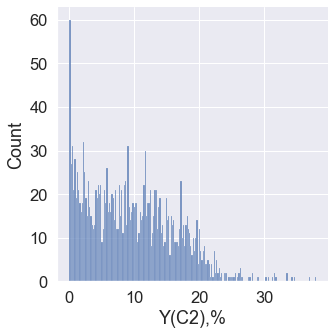

In [8]:
import seaborn as sns
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font_scale=1)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.color_palette("Set2")
g = sns.displot(mega2, x="Y(C2),%", bins=200)
# plt.xlabel("Predicted Yield (%)")
# plt.ylabel("Actual Yield (%)")
g.savefig("{}.png".format('Histogram of yield'), dpi=512)